In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from random import sample
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

data_file = "../data/full_dataset_0_analysis_merged.csv"
orig_data = pd.read_csv(data_file, index_col=False)
big_frame = orig_data[orig_data['Year'] > 2004]
big_frame['Duration'] = big_frame['Duration']/1000
print(big_frame.shape)
big_frame.dropna(inplace=True)
print(big_frame.shape)
print(big_frame.head(5))

(82871, 26)
(82577, 26)
                    Artist(s)        Date  Duration  Popularity  \
1        Ciara/Missy Elliott/  2005-07-12   231.773          42   
2  Unk/T-Pain/Jim Jones/E-40/  2007-09-25   322.933          51   
3  Unk/T-Pain/Jim Jones/E-40/  2007-09-25   322.933          51   
4  Unk/T-Pain/Jim Jones/E-40/  2007-09-25   322.933          52   
5  Unk/T-Pain/Jim Jones/E-40/  2007-09-25   322.933          52   

                                          Song Title  Success  acousticness  \
1  1, 2 Step (feat. Missy Elliott) - Don Candiani...        1        0.0176   
2            2 Step (feat. T-Pain, Jim Jones & E-40)        1        0.0564   
3            2 Step (feat. T-Pain, Jim Jones & E-40)        1        0.0564   
4            2 Step (feat. T-Pain, Jim Jones & E-40)        0        0.0564   
5            2 Step (feat. T-Pain, Jim Jones & E-40)        0        0.0564   

   danceability  energy                      id  instrumentalness  key  \
1         0.805   0.896 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [2]:
print(big_frame.describe())

           Duration    Popularity       Success  acousticness  danceability  \
count  82577.000000  82577.000000  82577.000000  82577.000000  82577.000000   
mean     229.805208     10.158821      0.022125      0.509078      0.510086   
std      153.509607     14.912675      0.147090      0.383308      0.198496   
min        2.741000      0.000000      0.000000      0.000000      0.000000   
25%      157.533000      0.000000      0.000000      0.091800      0.361000   
50%      206.193000      2.000000      0.000000      0.535000      0.523000   
75%      263.755000     16.000000      0.000000      0.916000      0.665000   
max     6048.556000     95.000000      1.000000      0.996000      0.985000   

             energy  instrumentalness           key      liveness  \
count  82577.000000      82577.000000  82577.000000  82577.000000   
mean       0.455580          0.238131      5.120966      0.226289   
std        0.288414          0.366290      3.536158      0.212688   
min        0

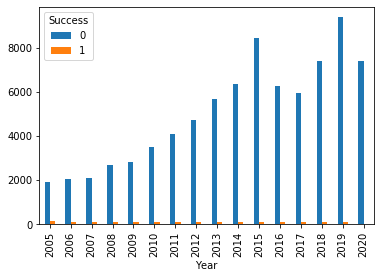

In [3]:
#big_frame = big_frame.astype({'Success': int})
big_frame.groupby(['Year', 'Success'])['Success'].count().unstack(1).plot.bar(label=['Hit','Non-Hit'])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(75409, 26)


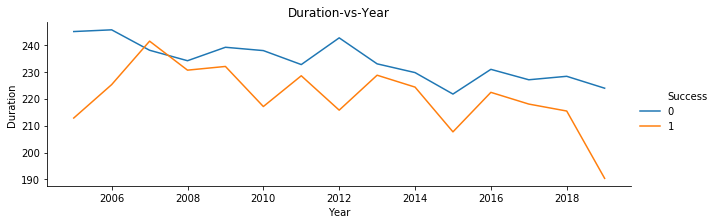

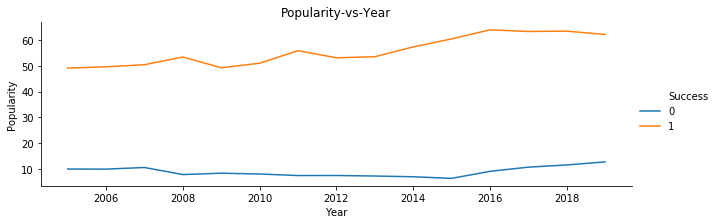

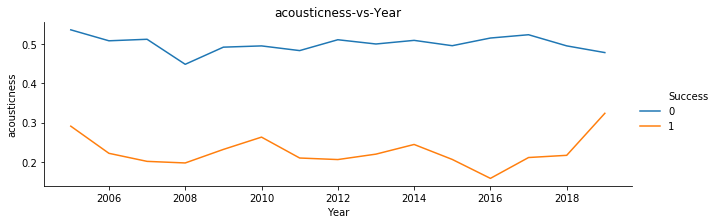

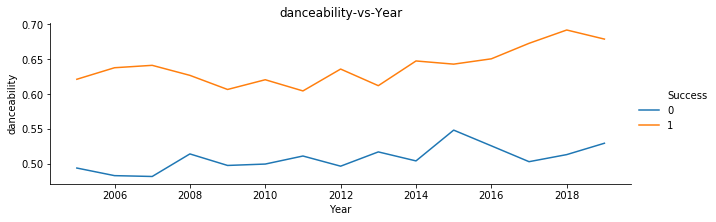

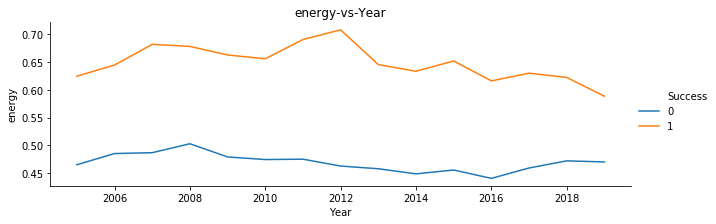

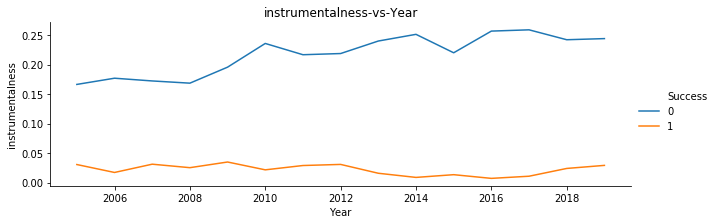

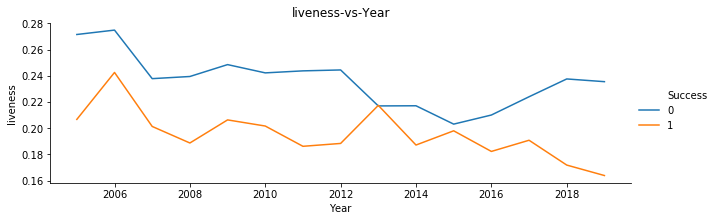

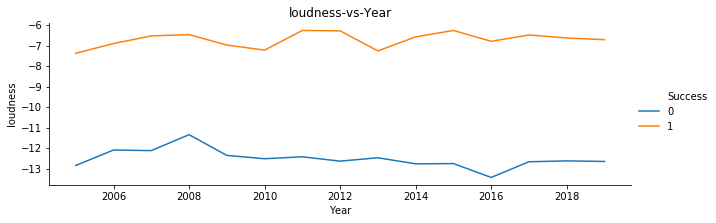

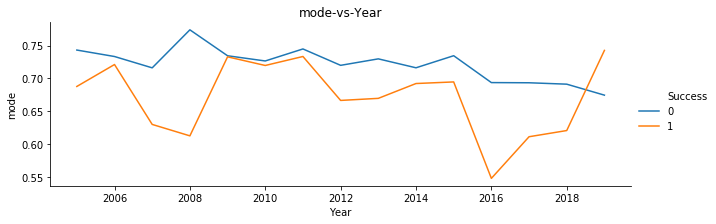

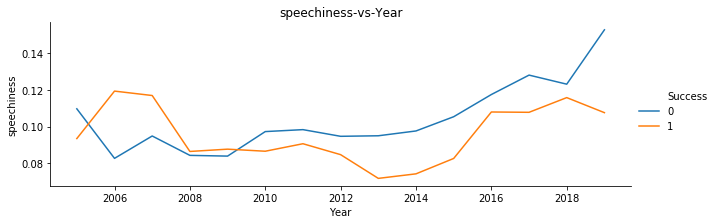

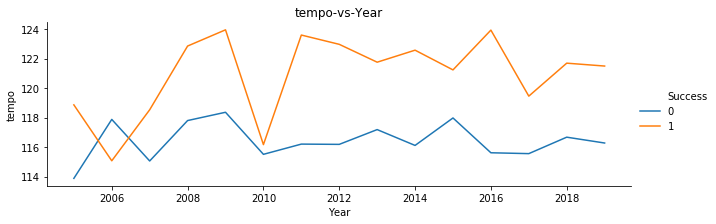

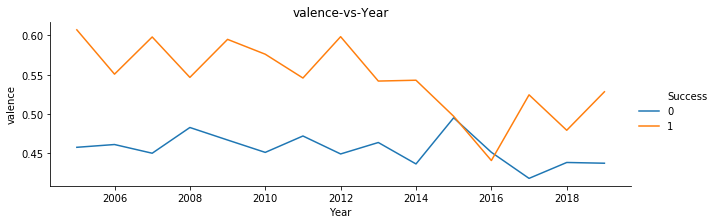

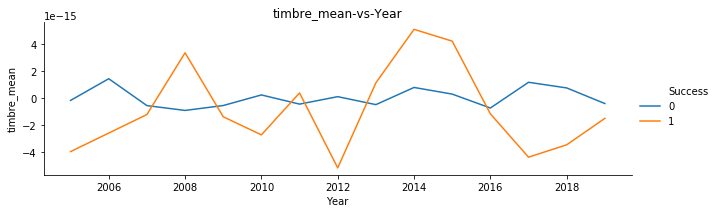

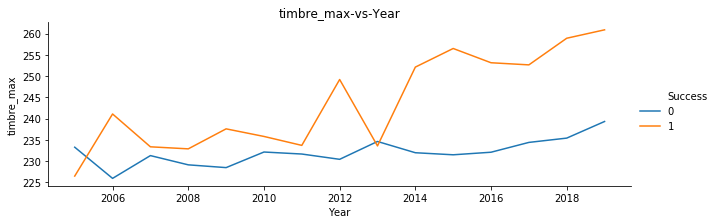

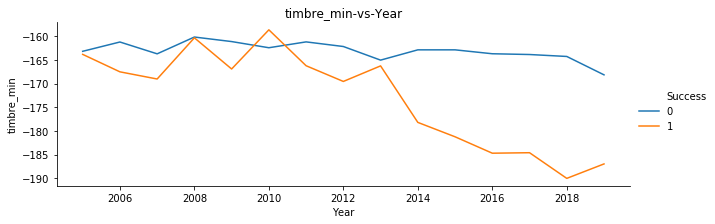

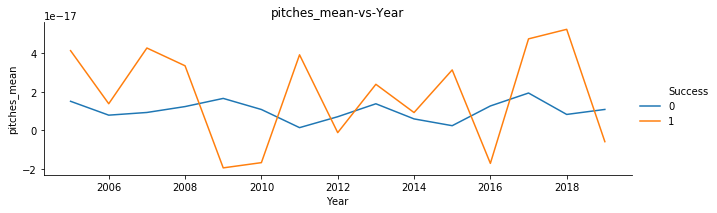

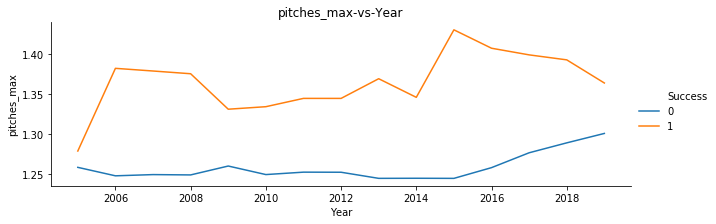

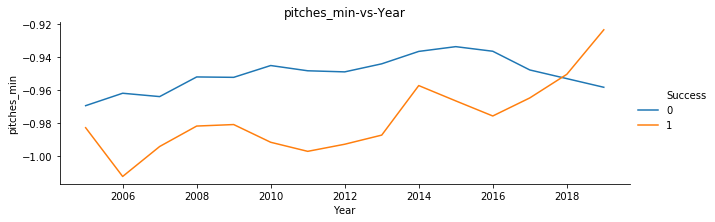

In [4]:
import seaborn as sns
#print(big_frame.columns)
big_frame_ = orig_data[orig_data['Year'].between(2005, 2019, inclusive = True)]
big_frame_['Duration'] = big_frame_['Duration']/1000
print(big_frame_.shape)
big_frame_.dropna(inplace=True)
features = ['Duration', 'Popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
        'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'Year',
        'timbre_mean', 'timbre_max',
       'timbre_min', 'pitches_mean', 'pitches_max', 'pitches_min']

for feat in features:
    if feat in ['Year']:
        continue
    fig = sns.relplot(x="Year", y=feat, hue="Success", kind="line", data=big_frame_, height=3, aspect=3, ci=None)
    label = feat+'-vs-Year'
    fig.set(title=label)
    fig.savefig('../images/'+label+'.png')

In [5]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = big_frame_[['Duration', 'Popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
        'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
y = big_frame_[['Success']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.head(5))
X_train = preprocessing.scale(X_train)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


        Duration  Popularity  acousticness  danceability  energy  \
33685    213.226           6       0.22200         0.705  0.6600   
99778    171.230           0       0.00884         0.351  0.5850   
6992     173.173          40       0.99600         0.483  0.0183   
106307   205.000           0       0.10600         0.676  0.7260   
36742    306.706           0       0.03230         0.112  0.9410   

        instrumentalness  liveness  loudness  speechiness    tempo  valence  
33685           0.000025    0.1860    -9.873       0.0254   90.304    0.734  
99778           0.861000    0.0835   -11.627       0.0642  149.953    0.103  
6992            0.902000    0.0749   -32.170       0.0531   65.009    0.474  
106307          0.962000    0.1790    -9.896       0.0381  136.555    0.867  
36742           0.059400    0.7400    -8.168       0.1140  210.525    0.236  


In [6]:

from IPython.display import Image 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
import os 

dot_data = tree.export_graphviz(clf, out_file=None, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.804908 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.804908 to fit



In [8]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_train)
print("Accuracy on train data: {0:.4f}".format(accuracy_score(y_train, y_pred)))
y_pred = clf.predict(X_test)
print("Accuracy on test data: {0:.4f}".format(accuracy_score(y_test, y_pred)))

Accuracy on train data: 1.0000
Accuracy on test data: 0.6770


In [9]:
# From the abovr results it looks like the model is overfitted
# We will prune the tree, for overfitting


from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()
parameters = {
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14],
}

cv = GridSearchCV(classifier, parameters, cv=10)
cv.fit(X_train,y_train)

best_param = cv.best_params_
print(best_param)

{'criterion': 'gini', 'max_leaf_nodes': 7}


In [10]:
#depth = misclassified_values.index(min(misclassified_values))+1
classifier = DecisionTreeClassifier(criterion= best_param['criterion'],max_leaf_nodes=best_param['max_leaf_nodes'])
classifier = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
print("Accuracy on train data: {0:.4f}".format(accuracy_score(y_train, y_pred)))
y_pred = classifier.predict(X_test)
print("Accuracy on test data: {0:.4f}".format(accuracy_score(y_test, y_pred)))

Accuracy on train data: 0.9856
Accuracy on test data: 0.5635
